### Lista de Exercício 1

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import contextily
import folium
import geopandas

In [3]:
#### Carregando os dados
# Importando "listings data"
url_listings = "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2024-12-27/data/listings.csv.gz"
df_listings = pd.read_csv(url_listings)

# Importando "calendar data"
url_calendar = "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2024-12-27/data/calendar.csv.gz"
# OBS: Vamos chamar o arquivo de "df_prices" para facilitar a manipulação
df_prices = pd.read_csv(url_calendar, compression="gzip")

In [4]:
df_prices['price'].dtype

dtype('O')

#### Aplicando função de manipulação de dados em df_prices

In [6]:
def tratamento_df_prices(dados):

    df = dados.copy()

    # Editando coluna price e transformando em float
    df['price'] = df['price'].str.replace('[$,]', '', regex = True).astype(float)

    # Editando coluna date
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    # Transformando coluna available
    df['available'] = df['available']=='f'

    return df

In [7]:
df_prices = tratamento_df_prices(df_prices)

#### Aplicando função de manipulação de dados em df_listings

In [9]:
def tratamento_df_listings(dados):

    df = dados.copy()

    # Alterando coluna price
    df['price'] = df['price'].str.replace('[$,]', '', regex = True).astype(float)

    # Selecionando colunas
    df = df[['id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price',
             'host_id', 'host_name', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
             'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
             'number_of_reviews', 'reviews_per_month', 'first_review', 'last_review', 'review_scores_rating']]
    
    # Renomeando colunas
    df = df.rename(columns={'id': 'listing_id', 'name': 'listing_title', 'price': 'mean_price', 'neighbourhood_cleansed': 'neighborhood'})

    df['log_price'] = np.log(1 + df['mean_price'])

    return df

In [10]:
df_listings = tratamento_df_listings(df_listings)

#### Merging df_prices e df_listings

In [12]:
# Merge
df = pd.merge(df_listings, df_prices, on = 'listing_id', how = 'inner')

In [13]:
df.head(10)

listing_id                      listing_title neighborhood  latitude  \
0      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
1      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
2      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
3      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
4      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
5      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
6      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
7      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
8      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   
9      271975  Unbelievable Ocean View Apartment      Vidigal -22.99508   

   longitude  mean_price  host_id host_name  host_response_time  \
0  -43.23604       236.0  1423140     Maria  a few days or more   
1  -43.23604       236.0  1423140     Maria  a few days or more   
2  -43.23604       236.0  1423140     Maria  a few days or more   
3  -43.23604       236.0  1423140     Maria  a few days or more   
4  -43.23604       236.0  1423140     Maria  a few days or more   
5  -43.23604       236.0  1423140     Maria  a few days or more   
6  -43.23604       236.0  1423140     Maria  a few days or more   
7  -43.23604       236.0  1423140     Maria  a few days or more   
8  -43.23604       236.0  1423140     Maria  a few days or more   
9  -43.23604       236.0  1423140     Maria  a few days or more   

  host_response_rate  ... first_review last_review review_scores_rating  \
0                 0%  ...   2013-02-16  2019-10-05                 4.14   
1                 0%  ...   2013-02-16  2019-10-05                 4.14   
2                 0%  ...   2013-02-16  2019-10-05                 4.14   
3                 0%  ...   2013-02-16  2019-10-05                 4.14   
4                 0%  ...   2013-02-16  2019-10-05                 4.14   
5                 0%  ...   2013-02-16  2019-10-05                 4.14   
6                 0%  ...   2013-02-16  2019-10-05                 4.14   
7                 0%  ...   2013-02-16  2019-10-05                 4.14   
8                 0%  ...   2013-02-16  2019-10-05                 4.14   
9                 0%  ...   2013-02-16  2019-10-05                 4.14   

   log_price       date  available  price adjusted_price  minimum_nights  \
0    5.46806 2024-12-27       True  170.0            NaN             1.0   
1    5.46806 2024-12-28       True  170.0            NaN             1.0   
2    5.46806 2024-12-29       True  170.0            NaN             1.0   
3    5.46806 2024-12-30       True  170.0            NaN             1.0   
4    5.46806 2024-12-31       True  170.0            NaN             1.0   
5    5.46806 2025-01-01       True  170.0            NaN             1.0   
6    5.46806 2025-01-02       True  170.0            NaN             1.0   
7    5.46806 2025-01-03       True  170.0            NaN             1.0   
8    5.46806 2025-01-04       True  170.0            NaN             1.0   
9    5.46806 2025-01-05       True  170.0            NaN             1.0   

   maximum_nights  
0            90.0  
1            90.0  
2            90.0  
3            90.0  
4            90.0  
5            90.0  
6            90.0  
7            90.0  
8            90.0  
9            90.0  

[10 rows x 30 columns]

## Plotagem

In [15]:
mpl.rcParams['figure.figsize'] = (10,6)          # Tamanho padrão da figura (largura x altura em polegadas)
mpl.rcParams['axes.labelsize'] = 16              # Tamanho dos rótulos dos eixos
mpl.rcParams['axes.titlesize'] = 18              # Tamanho do título do eixo
mpl.rcParams['axes.titleweight'] = 'bold'        # Peso da fonte do título do eixo
mpl.rcParams['figure.titlesize'] = 18            # Tamanho do título da figura
mpl.rcParams['figure.titleweight'] = 'bold'      # Peso da fonte do título da figura
mpl.rcParams['axes.titlepad'] = 20               # Espaçamento entre o título do eixo e o gráfico
mpl.rcParams['legend.facecolor'] = 'w'           # Fundo da legenda branco (padrão 'none' ou 'inherit')

# Estilo do Seaborn
sns.set_theme(style="darkgrid", rc=mpl.rcParams)

[Text(0.5, 1.0, 'Distribution of log-prices')]

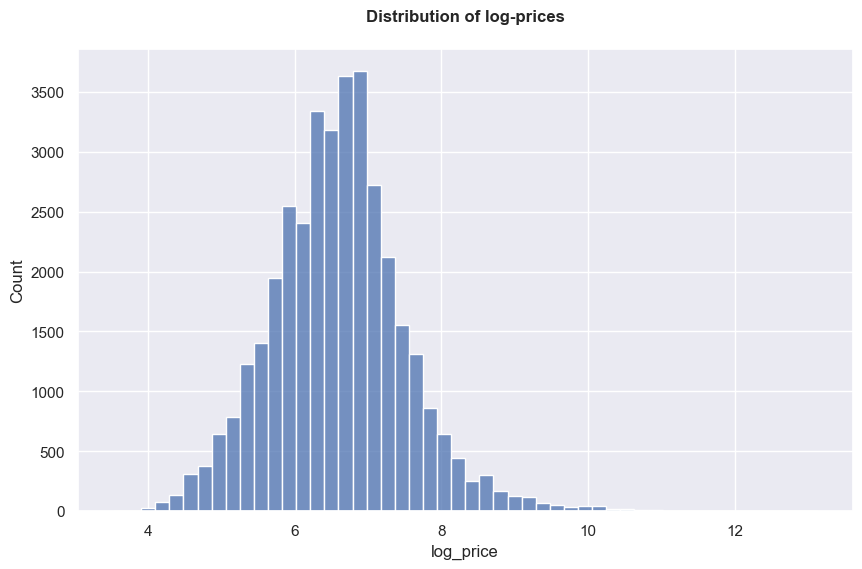

In [16]:
sns.histplot(df_listings['log_price'], bins=50).set(title='Distribution of log-prices')

[Text(0.5, 1.0, 'Distribution of log-prices with density')]

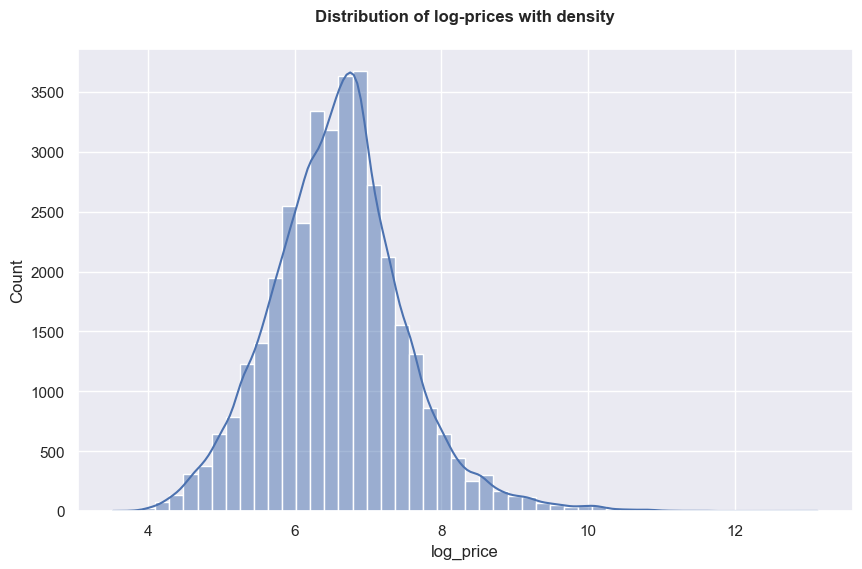

In [17]:
sns.histplot(df_listings['log_price'], bins=50, kde=True).set(title='Distribution of log-prices with density')

In [18]:
def criando_top5(dados):

    df = dados.copy()
    
    top5 = df['neighborhood'].value_counts()
    top5 = pd.concat([top5[:5], pd.Series(top5[5:].sum(), index=['Outros'])])
    top5_df = top5.reset_index()
    top5_df.columns = ['neighborhood', 'count']


    return top5_df

In [19]:
# Aplicando a função
top5_grafico = criando_top5(df_listings)

# Visualizando
top5_grafico

neighborhood  count
0                Copacabana  12352
1           Barra da Tijuca   3612
2                   Ipanema   3570
3  Recreio dos Bandeirantes   2060
4               Jacarepaguá   1848
5                    Outros  16057

[Text(0.5, 1.0, 'Number of observations by neighborhood')]

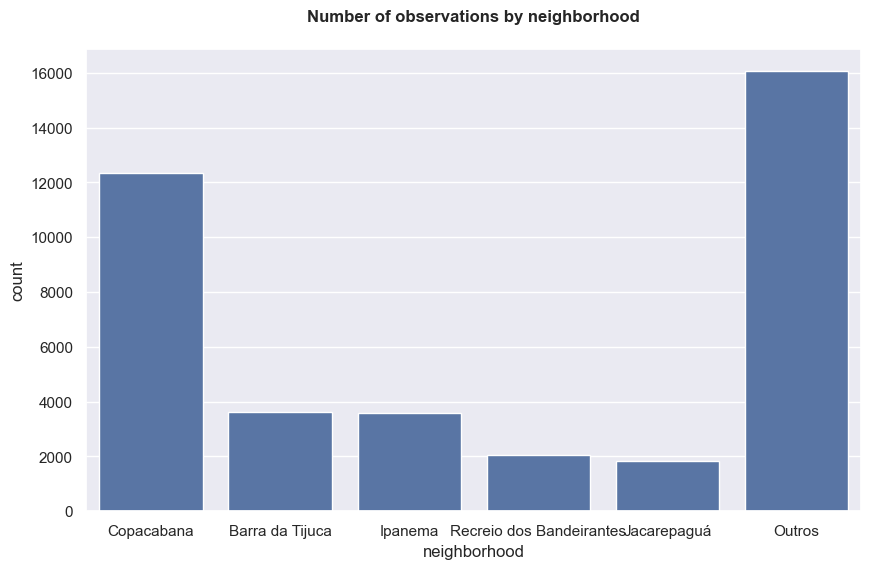

In [20]:
# Alterantiva ao countplot
sns.barplot(x="neighborhood", y = 'count', data = top5_grafico).set(title='Number of observations by neighborhood')

[Text(0.5, 1.0, 'Number of observations by neighborhood')]

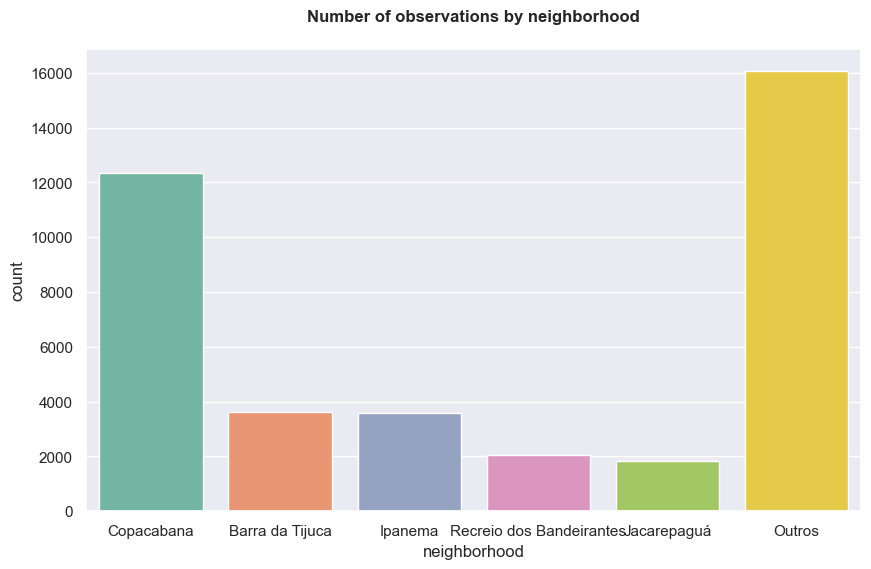

In [21]:
# Alterantiva ao countplot
sns.barplot(x="neighborhood", y = 'count', hue = 'neighborhood',
            data = top5_grafico, palette='Set2').set(title='Number of observations by neighborhood')

[Text(0.5, 1.0, 'Average price by neighborhood')]

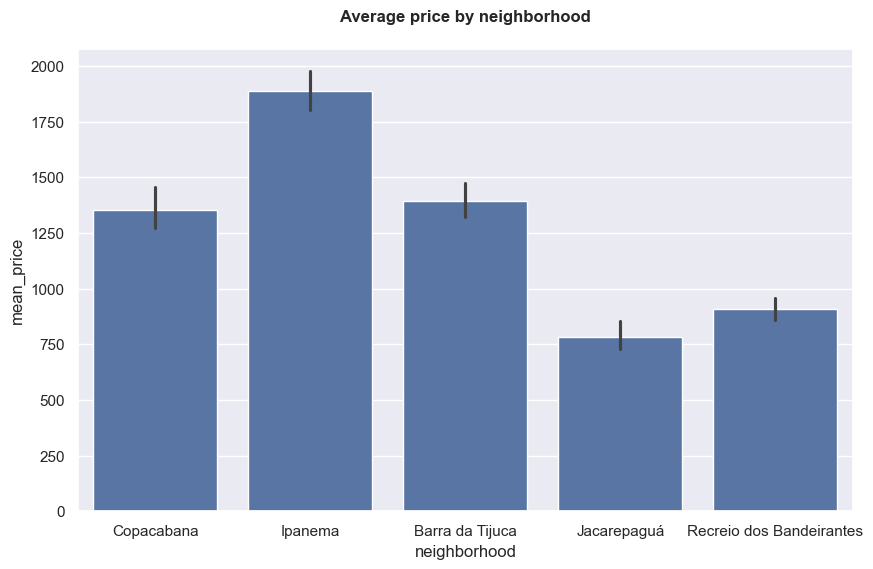

In [22]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']

sns.barplot(
    x="neighborhood",
    y="mean_price",
    data=df_listings[df_listings['neighborhood'].isin(lista_bairros)]).set(title='Average price by neighborhood')

[Text(0.5, 1.0, 'Average price by neighborhood')]

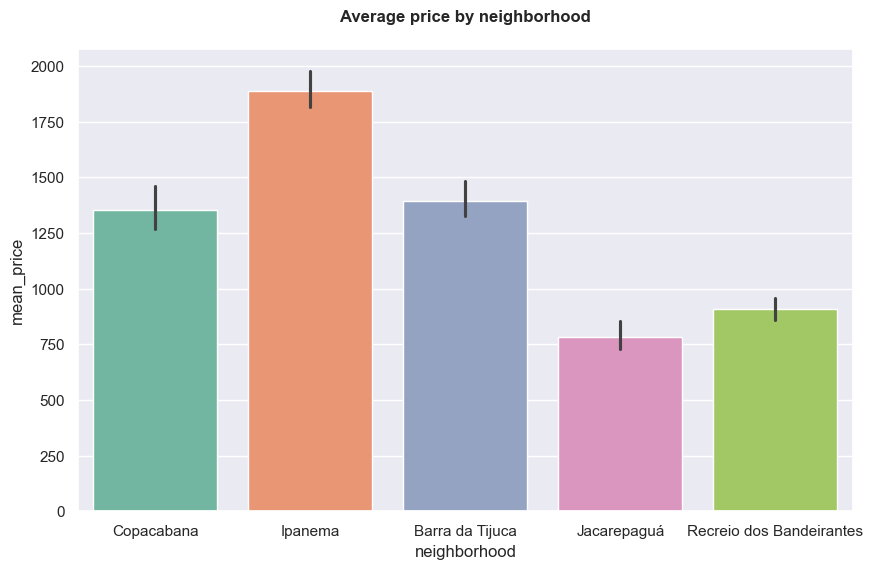

In [23]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']

sns.barplot(
    x="neighborhood",
    y="mean_price",
    hue="neighborhood",
    palette='Set2',
    data=df_listings[df_listings['neighborhood'].isin(lista_bairros)]).set(title='Average price by neighborhood')

[Text(0.5, 1.0, 'Average price by neighborhood')]

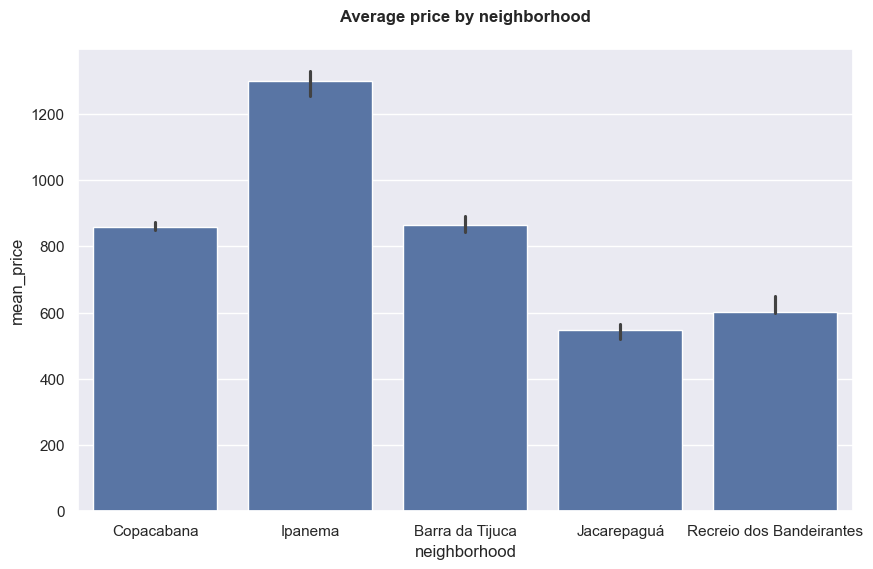

In [24]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']

sns.barplot(
    x="neighborhood",
    y="mean_price",
    data=df_listings[df_listings['neighborhood'].isin(lista_bairros)], estimator = np.median).set(title='Average price by neighborhood')

[Text(0.5, 1.0, 'Average price by neighborhood')]

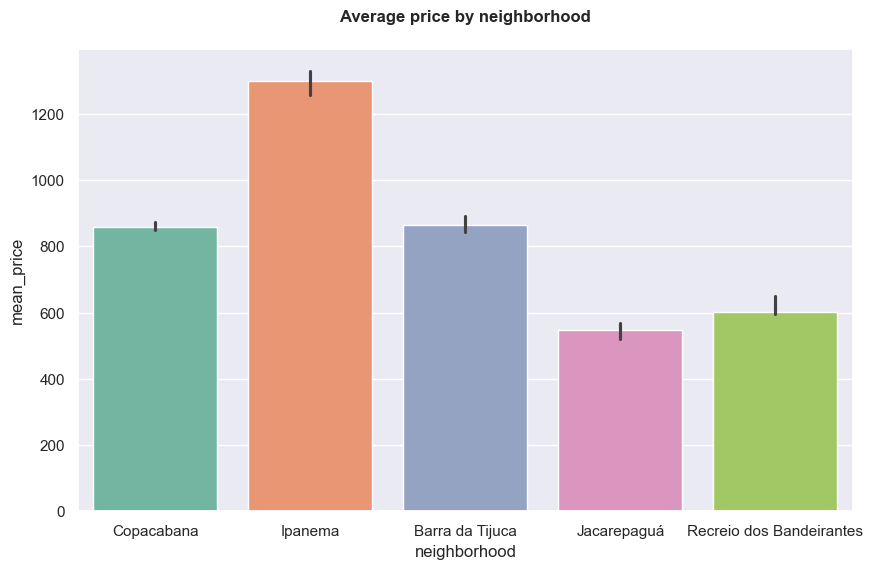

In [25]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']

sns.barplot(
    x="neighborhood",
    y="mean_price",
    hue="neighborhood",
    palette='Set2',
    data=df_listings[df_listings['neighborhood'].isin(lista_bairros)], estimator = np.median).set(title='Average price by neighborhood')

[Text(0.5, 1.0, 'Price distribution across neighborhoods')]

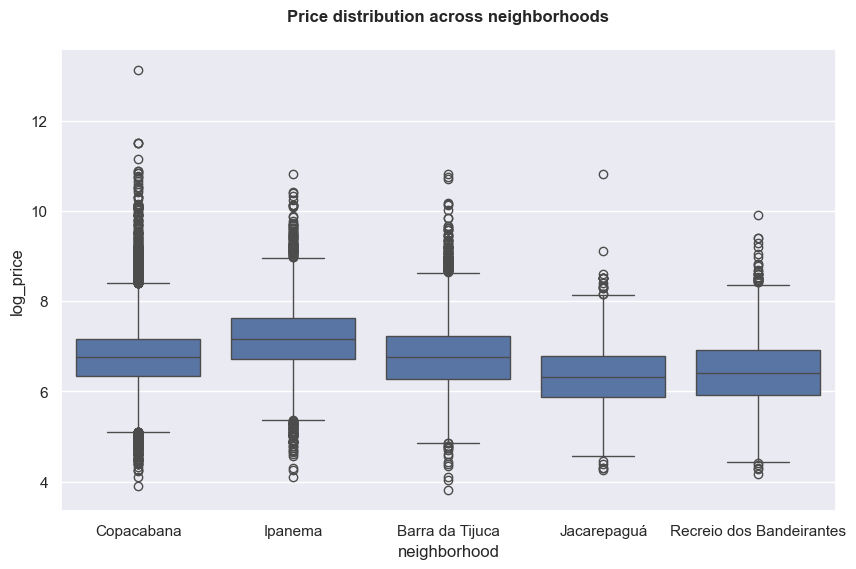

In [26]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']
sns.boxplot(x="neighborhood", y="log_price",
            data=df_listings[df_listings['neighborhood'].isin(lista_bairros)]).set(title='Price distribution across neighborhoods')

[Text(0.5, 1.0, 'Price distribution across neighborhoods')]

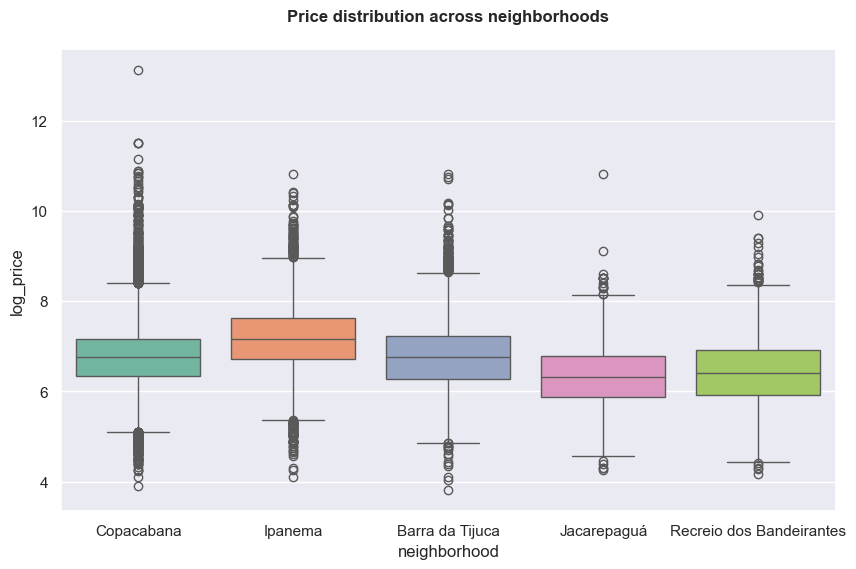

In [27]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']
sns.boxplot(x="neighborhood", y="log_price",
            data=df_listings[df_listings['neighborhood'].isin(lista_bairros)],
            hue="neighborhood", palette='Set2').set(title='Price distribution across neighborhoods')

[Text(0.5, 1.0, 'Price distribution across neighborhoods')]

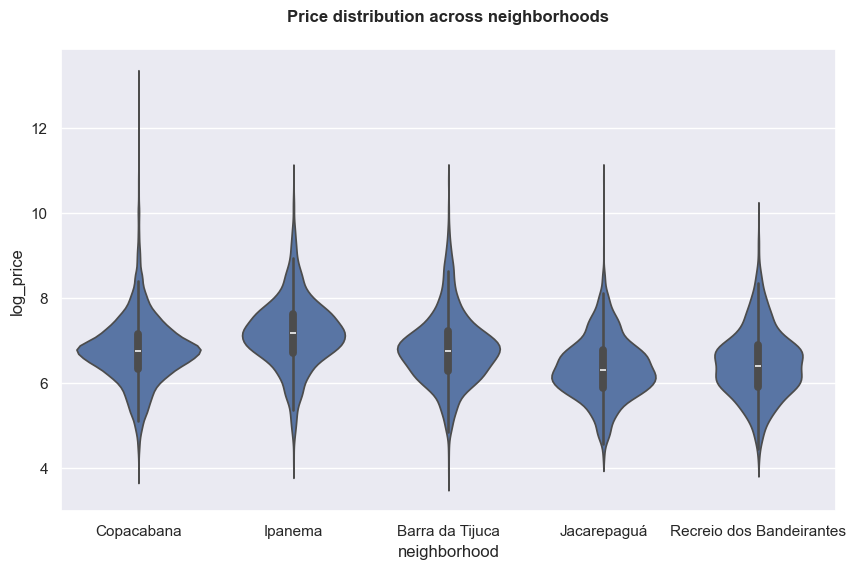

In [28]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']
sns.violinplot(x="neighborhood", y="log_price",
               data=df_listings[df_listings['neighborhood'].isin(lista_bairros)]).set(title='Price distribution across neighborhoods')

[Text(0.5, 1.0, 'Price distribution across neighborhoods')]

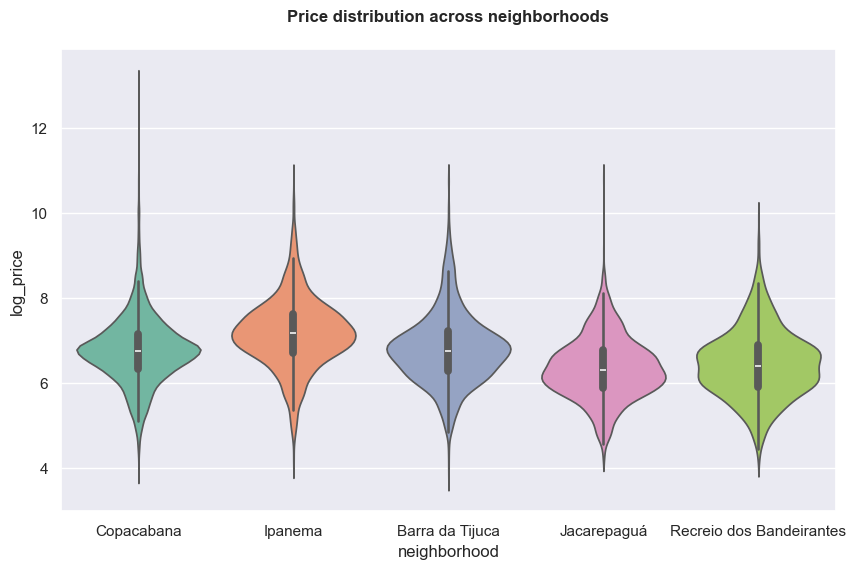

In [29]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']
sns.violinplot(x="neighborhood", y="log_price",
               data=df_listings[df_listings['neighborhood'].isin(lista_bairros)],
              hue="neighborhood", palette='Set2').set(title='Price distribution across neighborhoods')

[Text(0.5, 1.0, 'Price distribution across neighborhoods')]

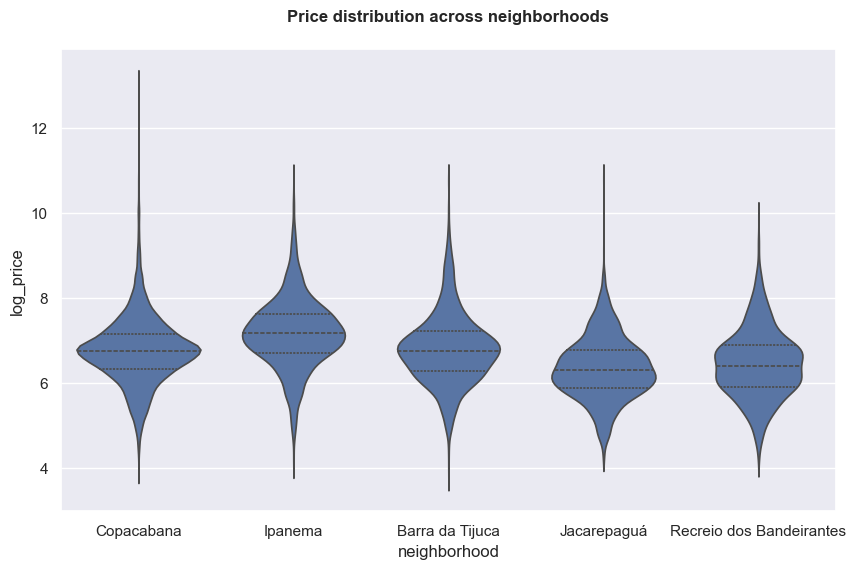

In [30]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']
sns.violinplot(x="neighborhood", y="log_price",
               data=df_listings[df_listings['neighborhood'].isin(lista_bairros)],
               inner="quartile").set(title='Price distribution across neighborhoods')

[Text(0.5, 1.0, 'Price distribution over time')]

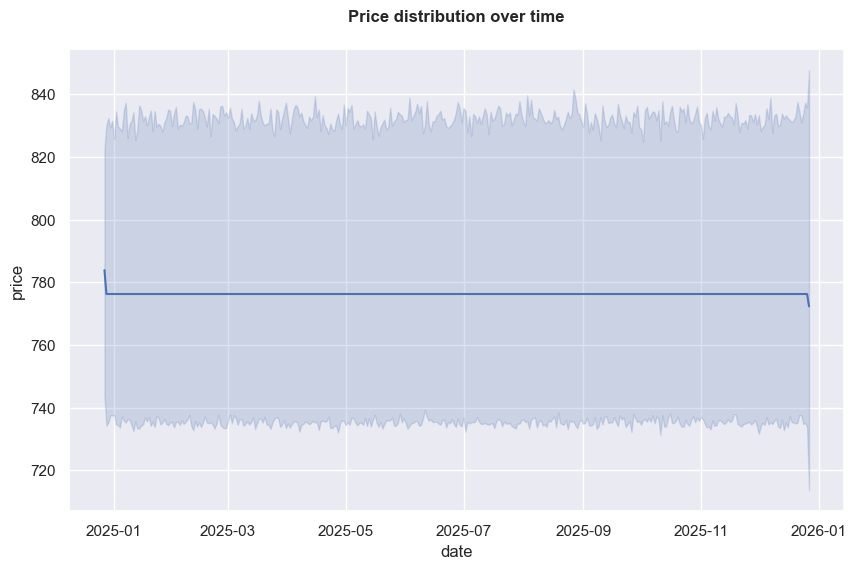

In [31]:
lista_bairros = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Recreio dos Bandeirantes', 'Jacarepaguá']
sns.lineplot(data=df[df['neighborhood'].isin(lista_bairros)],
             x='date', y='price').set(title="Price distribution over time")

In [32]:
df_listings["log_rpm"] = np.log(1 + df_listings["reviews_per_month"])

[Text(0.5, 1.0, 'Prices and Reviews')]

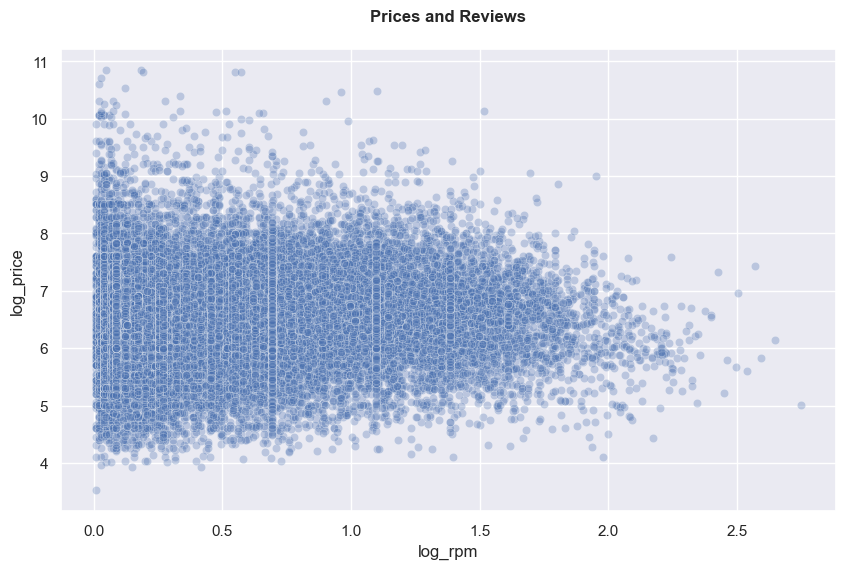

In [33]:
sns.scatterplot(data=df_listings, x="log_rpm", y="log_price", alpha=0.3).set(title='Prices and Reviews')

[Text(0.5, 1.0, 'Price and Reviews')]

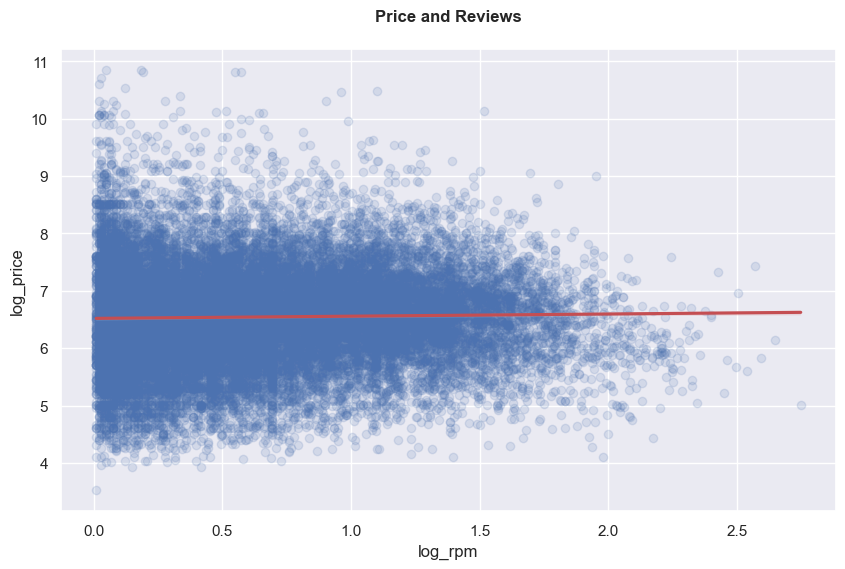

In [34]:
sns.regplot(x="log_rpm", y="log_price", data=df_listings, scatter_kws={'alpha':0.15}, line_kws={'color':'C3'}).set(title='Price and Reviews')

In [35]:
df_listings[["log_rpm", "log_price"]].isnull().sum()

log_rpm      10419
log_price     2855
dtype: int64

In [36]:
df_listings[["log_rpm", "log_price"]].describe()

log_rpm     log_price
count  29080.000000  36644.000000
mean       0.635859      6.589147
std        0.484792      0.907103
min        0.009950      3.526361
25%        0.223144      5.993961
50%        0.548121      6.591674
75%        0.982078      7.090910
max        2.748552     13.122365

C:\Users\thari\AppData\Local\Temp\ipykernel_40380\1992961142.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = temp.groupby('bin').agg({


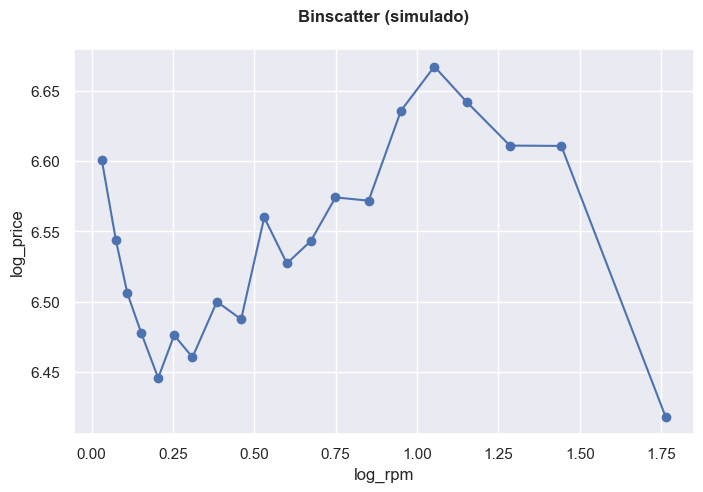

In [37]:
# Remove nans
temp = df_listings[["log_rpm", "log_price"]].dropna()

# Criar bins (por exemplo, 20 grupos)
temp['bin'] = pd.qcut(temp['log_rpm'], q=20, duplicates='drop')

# Calcular média por bin
binned = temp.groupby('bin').agg({
    'log_rpm': 'mean',
    'log_price': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(binned['log_rpm'], binned['log_price'], marker='o')
plt.title("Binscatter (simulado)")
plt.xlabel("log_rpm")
plt.ylabel("log_price")
plt.grid(True)
plt.show()

C:\Users\thari\AppData\Local\Temp\ipykernel_40380\2560769624.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = temp.groupby('bin').agg({


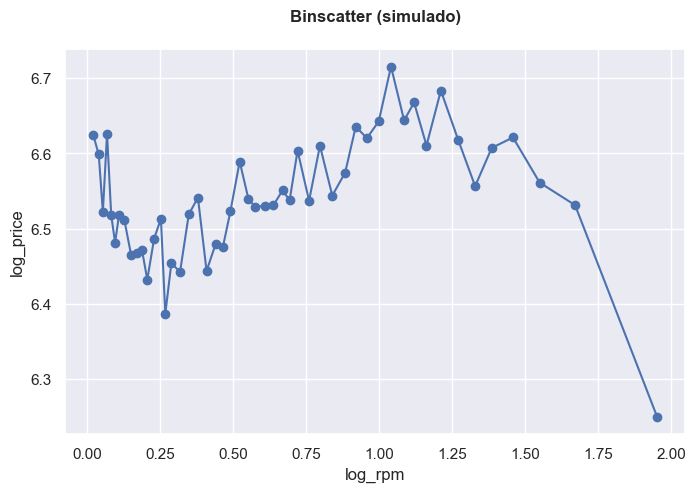

In [38]:
# Remove nans
temp = df_listings[["log_rpm", "log_price"]].dropna()

# Criar bins (por exemplo, 20 grupos)
temp['bin'] = pd.qcut(temp['log_rpm'], q=50, duplicates='drop')

# Calcular média por bin
binned = temp.groupby('bin').agg({
    'log_rpm': 'mean',
    'log_price': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(binned['log_rpm'], binned['log_price'], marker='o')
plt.title("Binscatter (simulado)")
plt.xlabel("log_rpm")
plt.ylabel("log_price")
plt.grid(True)
plt.show()

[Text(0.5, 1.0, 'Prices and Ratings, by room type')]

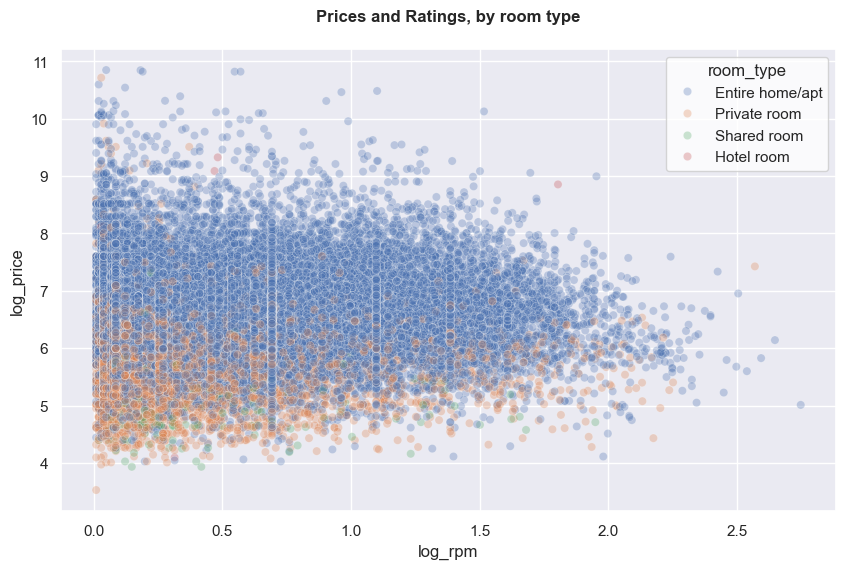

In [39]:
sns.scatterplot(data=df_listings, x="log_rpm", y="log_price", hue="room_type", alpha=0.3).set(title="Prices and Ratings, by room type")

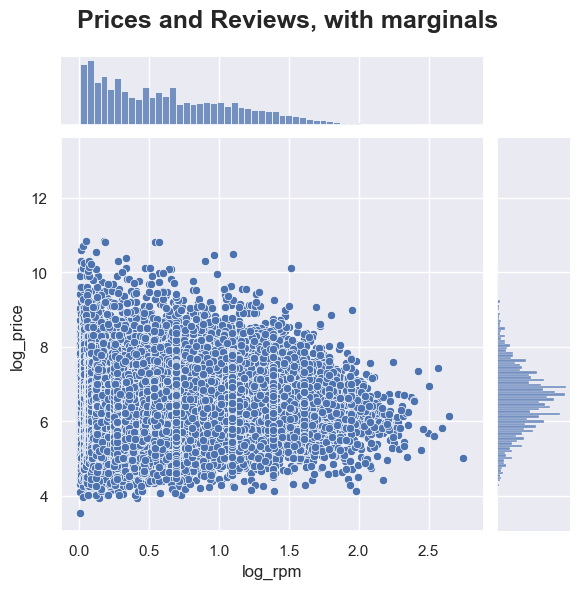

In [40]:
sns.jointplot(data=df_listings, x="log_rpm", y="log_price").fig.suptitle("Prices and Reviews, with marginals")
plt.subplots_adjust(top=0.9) # Ajusta o espaço para o título

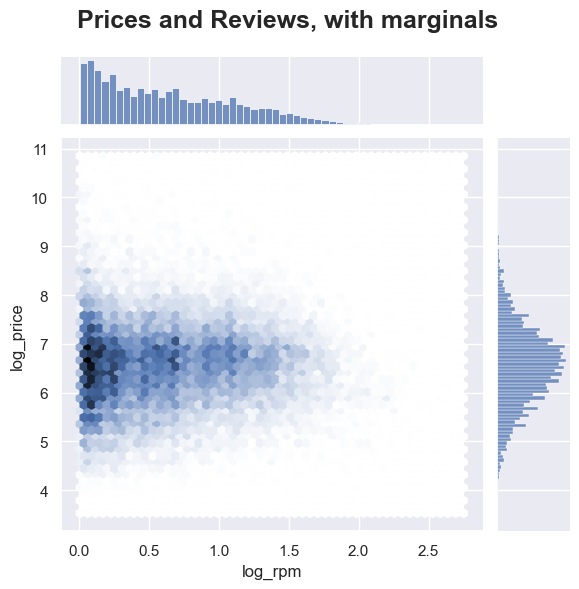

In [41]:
sns.jointplot(data=df_listings, x="log_rpm", y="log_price", kind="hex").fig.suptitle("Prices and Reviews, with marginals")
plt.subplots_adjust(top=0.9)

In [42]:
df_listings["log_reviews"] = np.log(1 + df_listings["number_of_reviews"])

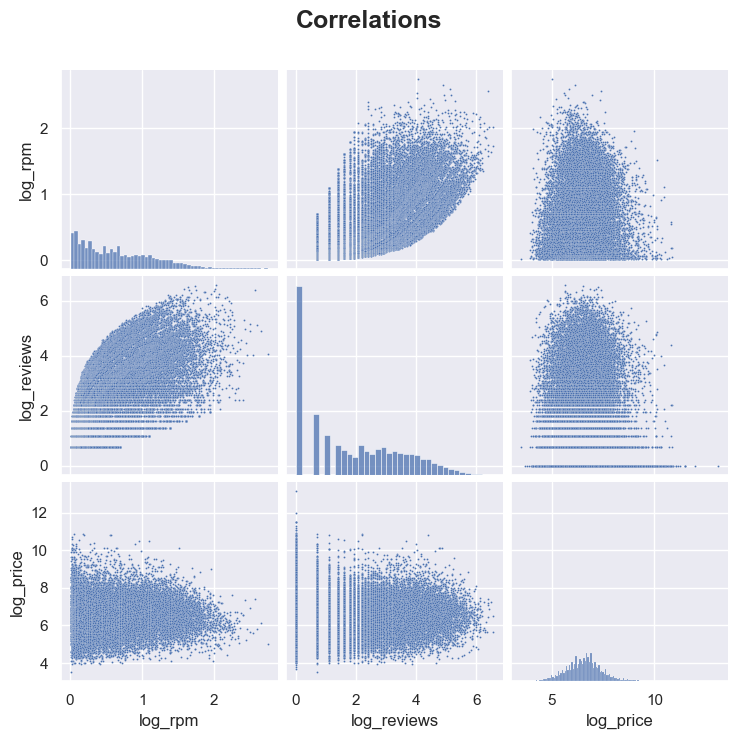

In [43]:
sns.pairplot(data=df_listings, vars=["log_rpm", "log_reviews", "log_price"], plot_kws={'s':2}).fig.suptitle("Correlations")
plt.subplots_adjust(top=0.9)

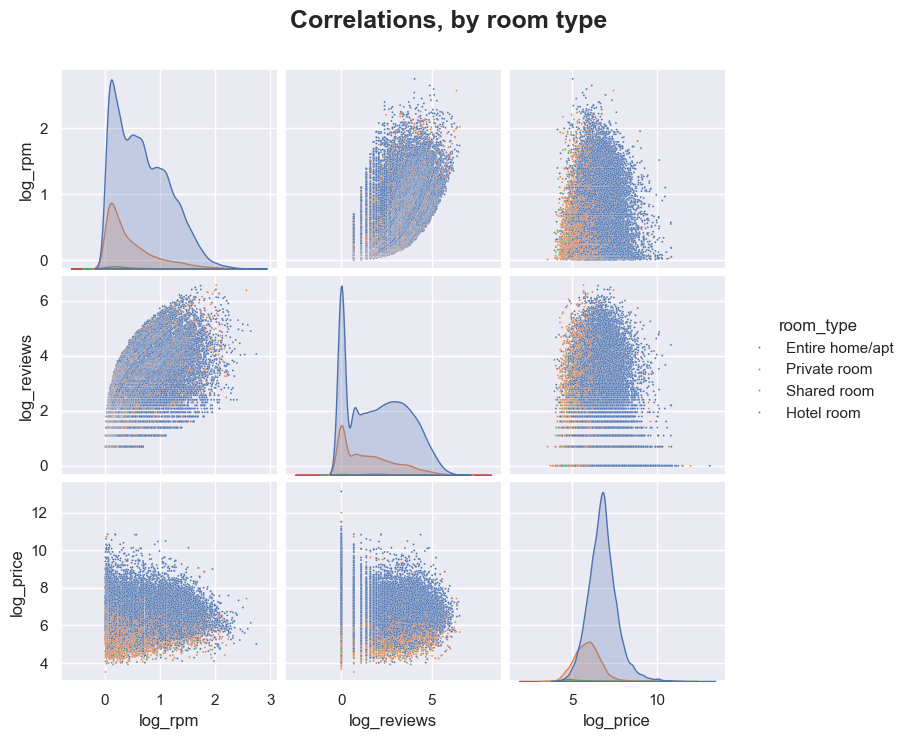

In [44]:
sns.pairplot(data=df_listings, vars=["log_rpm", "log_reviews", "log_price"], hue='room_type', plot_kws={'s':2}).fig.suptitle("Correlations, by room type")
plt.subplots_adjust(top=0.9)

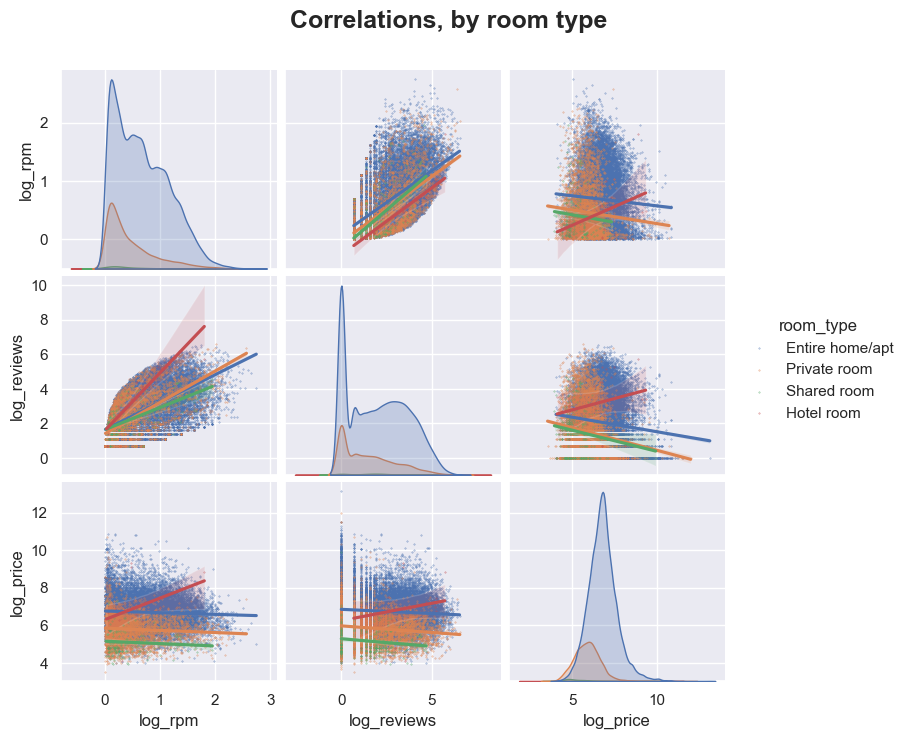

In [45]:
sns.pairplot(data=df_listings,
             vars=["log_rpm", "log_reviews", "log_price"],
             kind="reg",
             hue='room_type',
             plot_kws={'scatter_kws':{'s':.1}})\
.fig.suptitle("Correlations, by room type");
plt.subplots_adjust(top=0.9)

[Text(0.5, 1.0, 'Correlations')]

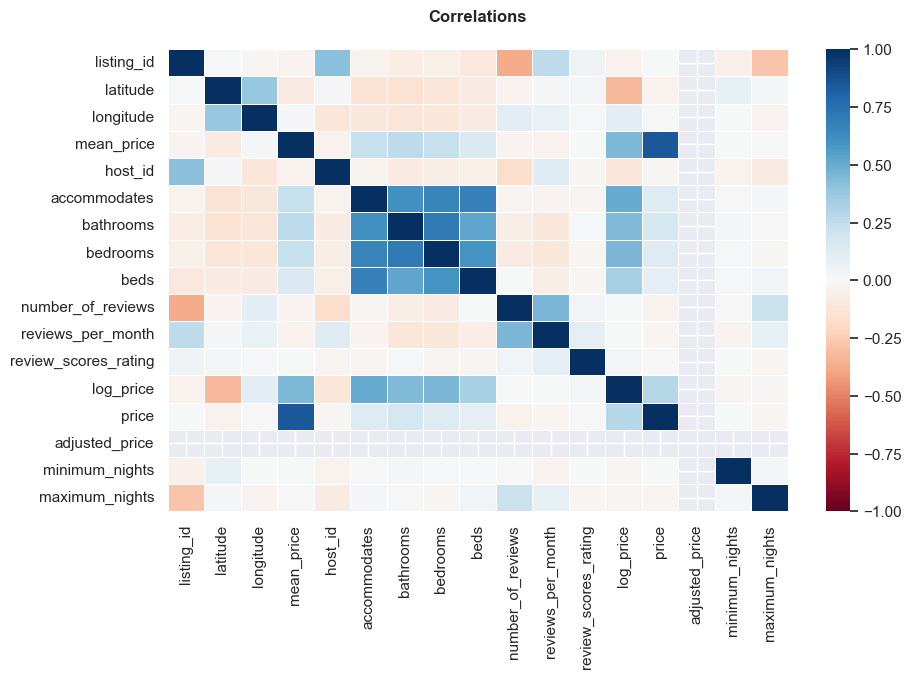

In [46]:
df_num = df.select_dtypes(include='number')
sns.heatmap(df_num.corr(), vmin=-1, vmax=1, linewidths=.5, cmap="RdBu")\
   .set(title="Correlations")

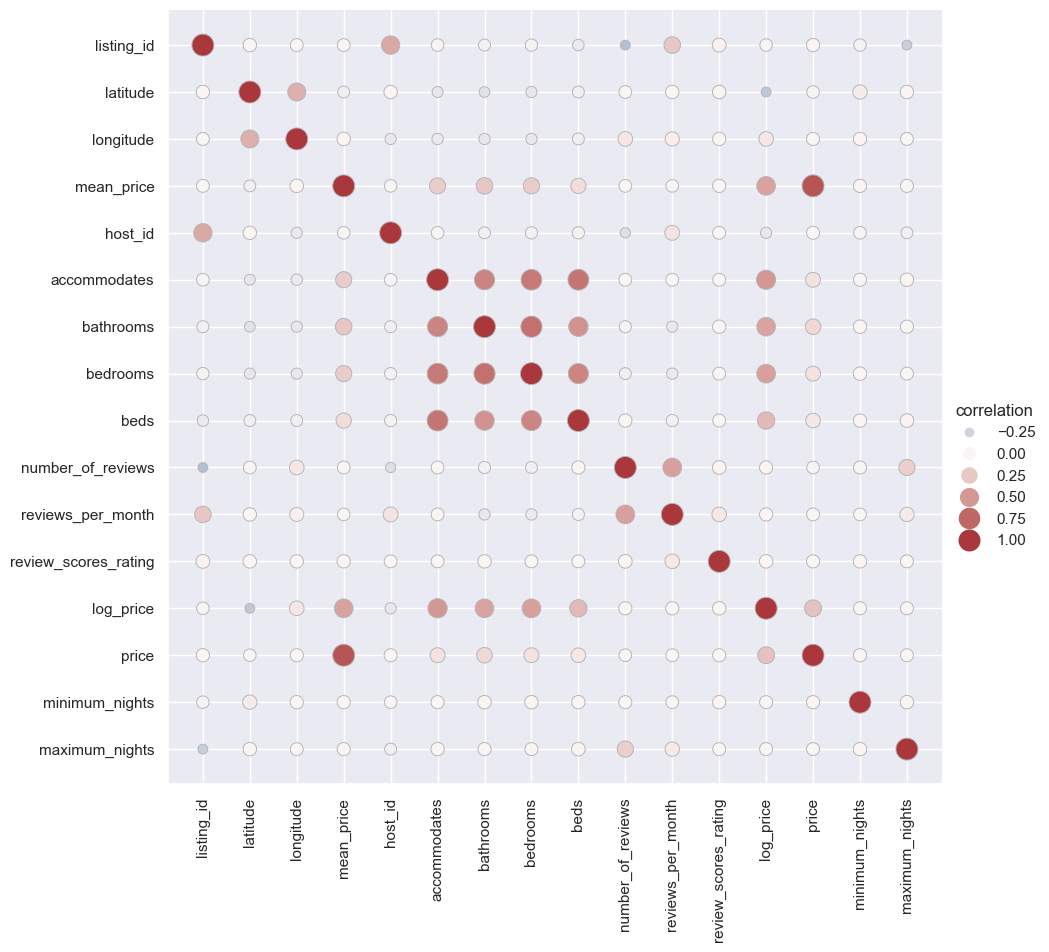

In [47]:
# Compute a correlation matrix and convert to long-form
df_num = df.select_dtypes(include='number')
corr_mat = df_num.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(data=corr_mat,
            x="level_0", y="level_1", hue="correlation", size="correlation",
            palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
            height=10, sizes=(50, 250), size_norm=(-.2, .8));

# Extra cleaning
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
g.set(xlabel="", ylabel="", aspect="equal");

[Text(0.5, 1.0, 'Listing coordinates')]

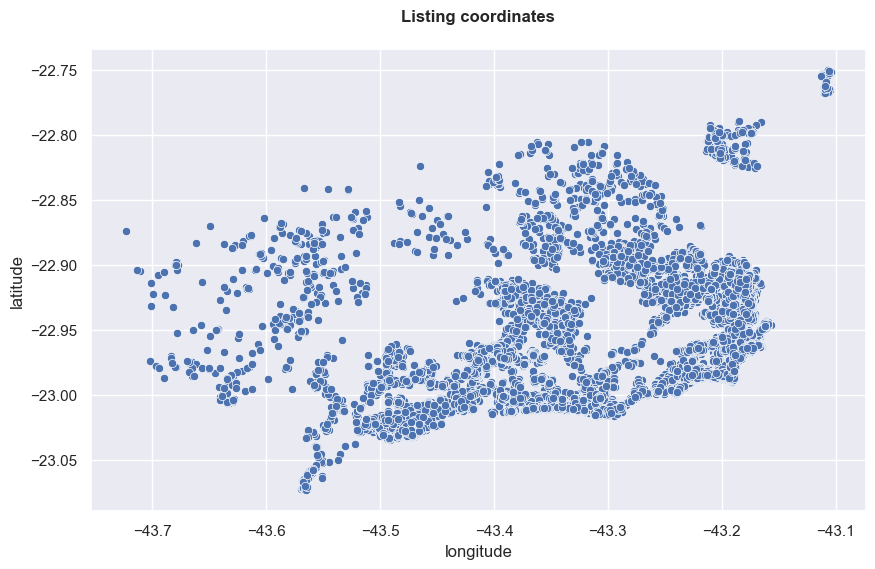

In [48]:
sns.scatterplot(data=df_listings, x="longitude", y="latitude").set(title='Listing coordinates')

In [49]:
import geopandas

geom = geopandas.points_from_xy(df_listings.longitude, df_listings.latitude)
gdf = geopandas.GeoDataFrame(df_listings, geometry=geom, crs=4326).to_crs(3857)

<Axes: title={'center': 'Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, Brasil'}, xlabel='X', ylabel='Y'>

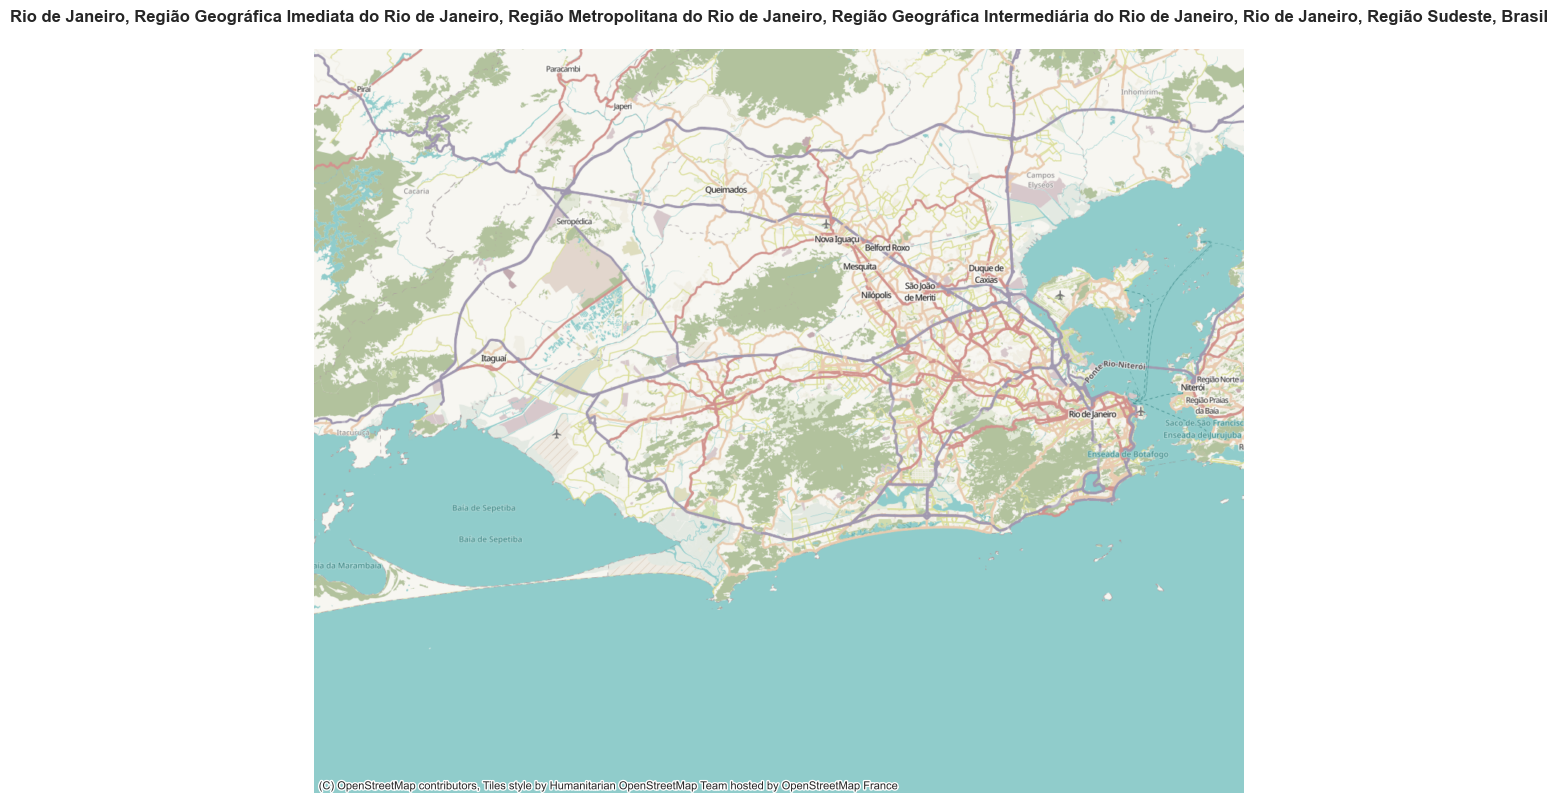

In [50]:
import contextily as cx
# Buscar por Bologna e exibe o mapa
rio = cx.Place("Rio de Janeiro, Brazil")
rio.plot()

<Axes: title={'center': 'Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, Brasil'}, xlabel='X', ylabel='Y'>

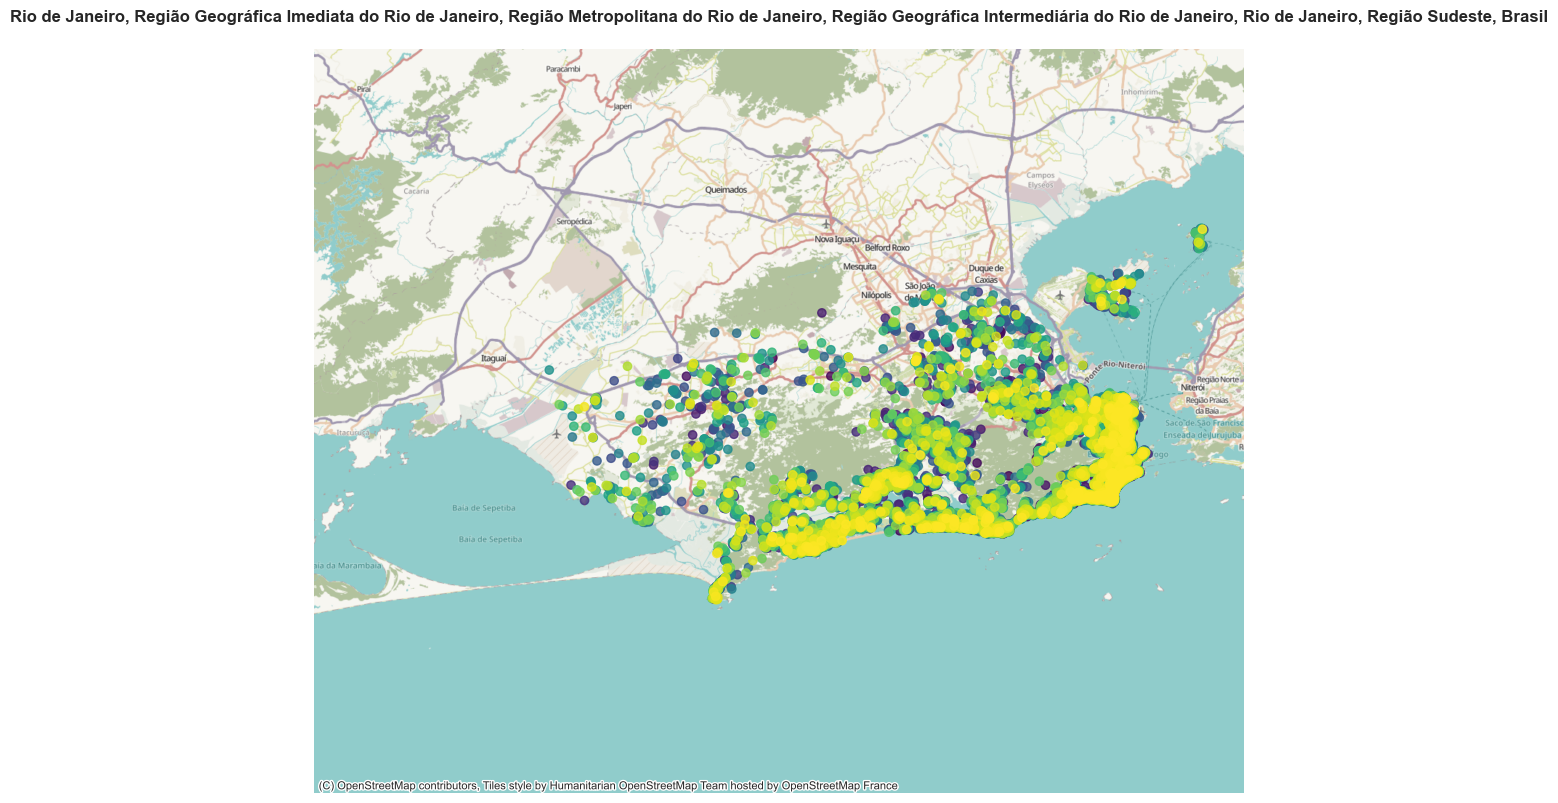

In [51]:
ax = rio.plot()
gdf.plot(ax=ax, c=df_listings['mean_price'], cmap='viridis', alpha=0.8)